In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [8]:
B50 = pd.read_csv(r'/Users/amish/Desktop/jupyter/final_1.csv')

In [9]:
B50.head()

,Slab Width,Slab Length,AL,B,C,CA,NB,CR,CU,MN,...,Radiant Tube Furnace Dewpoint,After Tube Cooling Dewpoint,Rapid Jet Cooling Dewpoint,Coating Thickness,Drying Furnace Press,B50,Hardness,Coreloss-Before Aging,Coreloss After Aging,Permeability
0,1265.0,9730.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-18.500,-26.132,-18.20668,1.50,-6.026,1.73,128.0,5.70,5.74,1963.0
1,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-99.000,-99.000,-98.99991,1.55,-6.324,1.73,120.0,5.92,5.92,1921.0
2,1265.0,7810.0,0.002,0.0001,0.0012,0.0002,0.0002,0.026,0.006,0.21,...,-25.112,-23.253,-12.16960,1.48,-6.512,1.72,124.0,5.15,5.15,1853.0
3,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-23.525,-27.873,-12.54678,1.41,-6.806,1.74,121.0,5.42,5.47,2071.0
4,1265.0,9730.0,0.001,0.0001,0.0016,0.0001,0.0002,0.031,0.006,0.20,...,-19.758,-25.796,-16.47658,1.37,-6.831,1.72,122.0,5.38,5.40,1747.0


In [10]:
X = B50.iloc[:, 0:35].values
y = B50.iloc[:, 35].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [12]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1866/1866 [==============================] - 7s 3ms/step - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 2/100
1866/1866 [==============================] - 5s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 3/100
1866/1866 [==============================] - 4s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 4/100
1866/1866 [==============================] - 4s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 5/100
1866/1866 [==============================] - 3s 2ms/step - loss: 7.5338e-04 - mean_squared_error: 7.5338e-04 - val_loss: 5.5610e-04 - val_mean_squared_error: 5.5610e-04
Epoch 6/100
1866/1866 [==============================] - 3s 2ms/step - loss: 3.4006e-04 - mean_squared_error: 3.4006e-04 - val_loss: 2.2909e-04 - val_mean_squa

1866/1866 [==============================] - 3s 2ms/step - loss: 8.1104e-05 - mean_squared_error: 8.1104e-05 - val_loss: 1.2477e-04 - val_mean_squared_error: 1.2477e-04
Epoch 47/100
1866/1866 [==============================] - 4s 2ms/step - loss: 7.7278e-05 - mean_squared_error: 7.7278e-05 - val_loss: 1.4035e-04 - val_mean_squared_error: 1.4035e-04
Epoch 48/100
1866/1866 [==============================] - 3s 2ms/step - loss: 8.2107e-05 - mean_squared_error: 8.2107e-05 - val_loss: 1.1813e-04 - val_mean_squared_error: 1.1813e-04
Epoch 49/100
1866/1866 [==============================] - 3s 2ms/step - loss: 7.6177e-05 - mean_squared_error: 7.6177e-05 - val_loss: 1.2785e-04 - val_mean_squared_error: 1.2785e-04
Epoch 50/100
1866/1866 [==============================] - 5s 3ms/step - loss: 8.1435e-05 - mean_squared_error: 8.1435e-05 - val_loss: 1.2327e-04 - val_mean_squared_error: 1.2327e-04
Epoch 51/100
1866/1866 [==============================] - 4s 2ms/step - loss: 7.9776e-05 - mean_squared

Epoch 91/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.3154e-05 - mean_squared_error: 6.3154e-05 - val_loss: 1.0607e-04 - val_mean_squared_error: 1.0607e-04
Epoch 92/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.2952e-05 - mean_squared_error: 6.2952e-05 - val_loss: 1.1640e-04 - val_mean_squared_error: 1.1640e-04
Epoch 93/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.2714e-05 - mean_squared_error: 6.2714e-05 - val_loss: 1.1596e-04 - val_mean_squared_error: 1.1596e-04
Epoch 94/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.1943e-05 - mean_squared_error: 6.1943e-05 - val_loss: 1.0978e-04 - val_mean_squared_error: 1.0978e-04
Epoch 95/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.1179e-05 - mean_squared_error: 6.1179e-05 - val_loss: 1.2803e-04 - val_mean_squared_error: 1.2803e-04
Epoch 96/100
1866/1866 [==============================] - 3s 2ms/step - loss: 6.5454e-05 -

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.0076419334744122136
0.010091708421954886


In [14]:

from sklearn.metrics import r2_score

r1=r2_score(pred,y_test)
print(r1)

0.8052721754206241


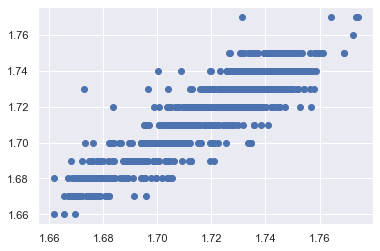

In [15]:
plt.scatter(pred,y_test)

# Hardness

In [16]:
X = B50.iloc[:, 0:35].values
y = B50.iloc[:, 36].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

Epoch 1/100
1866/1866 [==============================] - 4s 2ms/step - loss: 972.1215 - mean_squared_error: 972.1215 - val_loss: 101.4283 - val_mean_squared_error: 101.4283
Epoch 2/100
1866/1866 [==============================] - 3s 2ms/step - loss: 58.6221 - mean_squared_error: 58.6221 - val_loss: 50.5274 - val_mean_squared_error: 50.5274
Epoch 3/100
1866/1866 [==============================] - 11s 6ms/step - loss: 37.5019 - mean_squared_error: 37.5019 - val_loss: 39.6636 - val_mean_squared_error: 39.6636
Epoch 4/100
1866/1866 [==============================] - 13s 7ms/step - loss: 32.5665 - mean_squared_error: 32.5665 - val_loss: 33.7740 - val_mean_squared_error: 33.7740
Epoch 5/100
1866/1866 [==============================] - 6s 3ms/step - loss: 26.9879 - mean_squared_error: 26.9879 - val_loss: 54.2812 - val_mean_squared_error: 54.2812
Epoch 6/100
1866/1866 [==============================] - 5s 3ms/step - loss: 25.4570 - mean_squared_error: 25.4570 - val_loss: 28.4266 - val_mean_squ

1866/1866 [==============================] - 14s 7ms/step - loss: 9.2423 - mean_squared_error: 9.2423 - val_loss: 21.2497 - val_mean_squared_error: 21.2497
Epoch 50/100
1866/1866 [==============================] - 7s 4ms/step - loss: 9.5937 - mean_squared_error: 9.5937 - val_loss: 22.5214 - val_mean_squared_error: 22.5214
Epoch 51/100
1866/1866 [==============================] - 4s 2ms/step - loss: 9.8011 - mean_squared_error: 9.8011 - val_loss: 12.4883 - val_mean_squared_error: 12.4883
Epoch 52/100
1866/1866 [==============================] - 11s 6ms/step - loss: 9.5244 - mean_squared_error: 9.5244 - val_loss: 9.6962 - val_mean_squared_error: 9.6962
Epoch 53/100
1866/1866 [==============================] - 4s 2ms/step - loss: 9.2890 - mean_squared_error: 9.2890 - val_loss: 16.5794 - val_mean_squared_error: 16.5794
Epoch 54/100
1866/1866 [==============================] - 4s 2ms/step - loss: 9.3286 - mean_squared_error: 9.3286 - val_loss: 9.8827 - val_mean_squared_error: 9.8827
Epoch 5

1866/1866 [==============================] - 3s 2ms/step - loss: 7.0609 - mean_squared_error: 7.0609 - val_loss: 10.2907 - val_mean_squared_error: 10.2907
Epoch 98/100
1866/1866 [==============================] - 5s 3ms/step - loss: 6.9324 - mean_squared_error: 6.9324 - val_loss: 16.2368 - val_mean_squared_error: 16.2368
Epoch 99/100
1866/1866 [==============================] - 9s 5ms/step - loss: 6.4285 - mean_squared_error: 6.4285 - val_loss: 13.4286 - val_mean_squared_error: 13.4286
Epoch 100/100
1866/1866 [==============================] - 7s 4ms/step - loss: 6.8428 - mean_squared_error: 6.8428 - val_loss: 12.1078 - val_mean_squared_error: 12.1078
2.8799697124289216
3.5652773745587516


0.9595135741795037


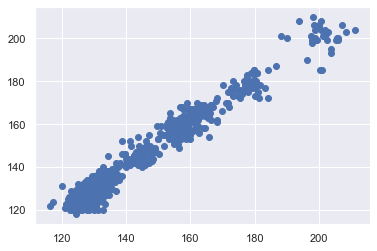

In [17]:

from sklearn.metrics import r2_score

r1=r2_score(pred,y_test)
print(r1)
plt.scatter(pred,y_test)

# Coreloss-Before Aging

In [ ]:
X = B50.iloc[:, 0:35].values
y = B50.iloc[:, -3].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

Epoch 1/100
1866/1866 [==============================] - 15s 6ms/step - loss: 0.5774 - mean_squared_error: 0.5774 - val_loss: 0.1796 - val_mean_squared_error: 0.1796
Epoch 2/100
1866/1866 [==============================] - 6s 3ms/step - loss: 0.1332 - mean_squared_error: 0.1332 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3/100
1866/1866 [==============================] - 7s 4ms/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1104 - val_mean_squared_error: 0.1104
Epoch 4/100
1866/1866 [==============================] - 6s 3ms/step - loss: 0.0976 - mean_squared_error: 0.0976 - val_loss: 0.1153 - val_mean_squared_error: 0.1153
Epoch 5/100
1866/1866 [==============================] - 7s 4ms/step - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.0872 - val_mean_squared_error: 0.0872
Epoch 6/100
1866/1866 [==============================] - 26s 14ms/step - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 7

In [ ]:

from sklearn.metrics import r2_score

r1=r2_score(pred,y_test)
print(r1)
plt.scatter(pred,y_test)

# Coreloss After Aging

In [ ]:
X = B50.iloc[:, 0:35].values
y = B50.iloc[:, -2].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:

from sklearn.metrics import r2_score

r1=r2_score(pred,y_test)
print(r1)
plt.scatter(pred,y_test)

# Permeability

In [ ]:
X = B50.iloc[:, 0:35].values
y = B50.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:

from sklearn.metrics import r2_score

r1=r2_score(pred,y_test)
print(r1)
plt.scatter(pred,y_test)